In [1]:
import numpy as ne 
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.load('hand_gestures/Sign/Sign-language-digits-dataset/X.npy')
Y = np.load('hand_gestures/Sign-language-digits-dataset/Y.npy')
len(X) , len(Y)

(2062, 2062)

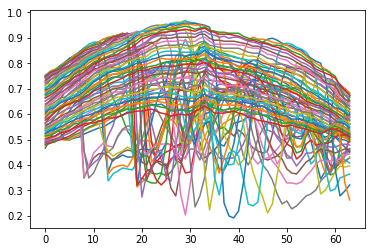

In [3]:
plt.plot(X[0])
plt.show()

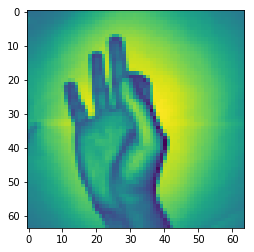

In [4]:
plt.imshow(X[0])
plt.show()

In [5]:
def show_plot(X, start,end,mid):
    for i in range(start,end, mid):
        plt.imshow(X[i], cmap='gray')
        plt.show()

In [6]:
# for i in range(200):
print(Y)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


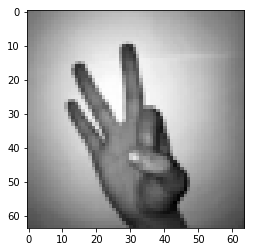

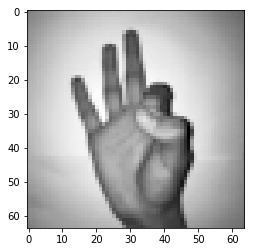

In [7]:

show_plot(X,202,204)

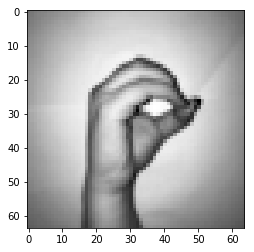

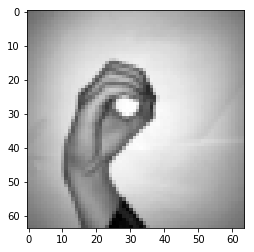

In [8]:
show_plot(X,407,409)

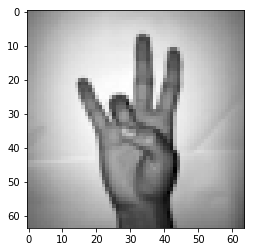

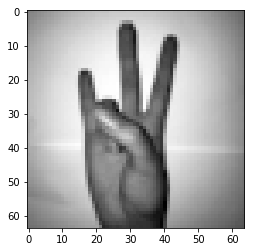

In [9]:
show_plot(X,613,615)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=8)

In [12]:
Xtest = Xtest[:,:,:,np.newaxis]
Xtrain=Xtrain[:,:,:,np.newaxis]

In [13]:
Xtrain.shape

(1649, 64, 64, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()

model.add(Conv2D(input_shape=(64, 64, 1), filters=32, kernel_size=(4,4),activation=('relu'),strides=(2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu',strides=(1)))

model.add(MaxPooling2D(pool_size=4))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(Xtrain, ytrain, batch_size=64, epochs=5)

score = model.evaluate(Xtest, ytest, verbose=0)

Epoch 1/5
1649/1649 [==============================] - 16s 10ms/step - loss: 0.2445 - acc: 0.9164
Epoch 2/5
1649/1649 [==============================] - 17s 10ms/step - loss: 0.1070 - acc: 0.9600
Epoch 3/5
1649/1649 [==============================] - 15s 9ms/step - loss: 0.0798 - acc: 0.9722
Epoch 4/5
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0641 - acc: 0.9778
Epoch 5/5
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0544 - acc: 0.9816


In [16]:
print(score)

[0.063558090090318681, 0.97772397703466352]
